# DSCI 100 Project

### Title: The Effects of Lifestyle Based Variables on the Math Grades of Students

### Introduction:

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal:
- Clearly state the question you will try to answer with your project:
- Identify and describe the dataset that will be used to answer the question:


This group will be examining factors influencing student performance in Portuguese secondary students to attempt to answer the question of which factor is most influential in promoting good grades. We will be approaching this problem using classification techniques in R.
The student achievement data was collected from 2 Portuguese secondary schools and assessed performance in mathematics. The data includes the target variable (student grades during periods 1, 2, and 3) in addition to 30 predictor variables. For the purposes of this project, we have chosen 3 variables with numerical values to be able to determine the answer to our question. The 3 variables are hours of free time, hours of study time, and number of school absences. Moreover, the data originally comes in an excel sheet format which will need to be considered when reading the data set into R. 
The data can be accessed through the link below
Data set: https://archive.ics.uci.edu/dataset/320/student+performance 
Data set source: UC Irvine Machine Learning Repository




### Preliminary exploratory data analysis

- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


In [4]:
url <- "https://raw.githubusercontent.com/chloezandberg/dsci-100-project/main/student-mat.csv"
math_data <- read_csv2(url)
math_data

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19


In [67]:
clean_math_data <- math_data |>
    select(freetime, studytime, absences, G3) |> # G3 is final grade in Portugese school system
    mutate(final_percentage = (G3/20)*100) |> # final grade is out of 20
    mutate(letter_grade = cut(final_percentage, c(-1, 49, 54, 67, 79, 100))) |> # recoding to be letter grade levels for classification problem
    mutate(letter_grade = recode(letter_grade,                                  # had to set lower limit to -1 to include grades of 0%
                                           "(-1,49]" = "F",
                                           "(49,54]" = "D",
                                           "(54,67]" = "C",
                                           "(67,79]" = "B",
                                           "(79,100]" = "A")) |> 
    select(freetime, studytime, absences, letter_grade) |>
    drop_na()
                                           
clean_math_data

freetime,studytime,absences,letter_grade
<dbl>,<dbl>,<dbl>,<fct>
3,2,6,F
3,2,4,F
3,2,10,D
2,3,2,B
3,2,4,D
4,2,10,B
4,2,0,C
1,2,6,F
2,2,0,A


### Exploratory Data Analysis

Below we investigate the averages of each of our predictors, the total number of observations, and the distribution of each class we intend to predict (as a bar graph visualization and a table).

In [68]:
avg_predictors <- clean_math_data |>
            select(freetime, studytime, absences) |>
            map_df(mean) |>
            rename("avg_freetime" = "freetime",
                   'avg_studytime' = 'studytime',
                   'avg_absences' = 'absences')

count_observations <- nrow(clean_math_data)

count_class <- clean_math_data |>
            group_by(letter_grade) |>
            summarize(count = n())

count_class

observations_tibble <- tibble(number_observations = count_observations)

exploratory_data_analysis <- bind_cols(observations_tibble, avg_predictors)

exploratory_data_analysis

letter_grade,count
<fct>,<int>
F,130
D,56
C,109
B,60
A,40


number_observations,avg_freetime,avg_studytime,avg_absences
<int>,<dbl>,<dbl>,<dbl>
395,3.235443,2.035443,5.708861


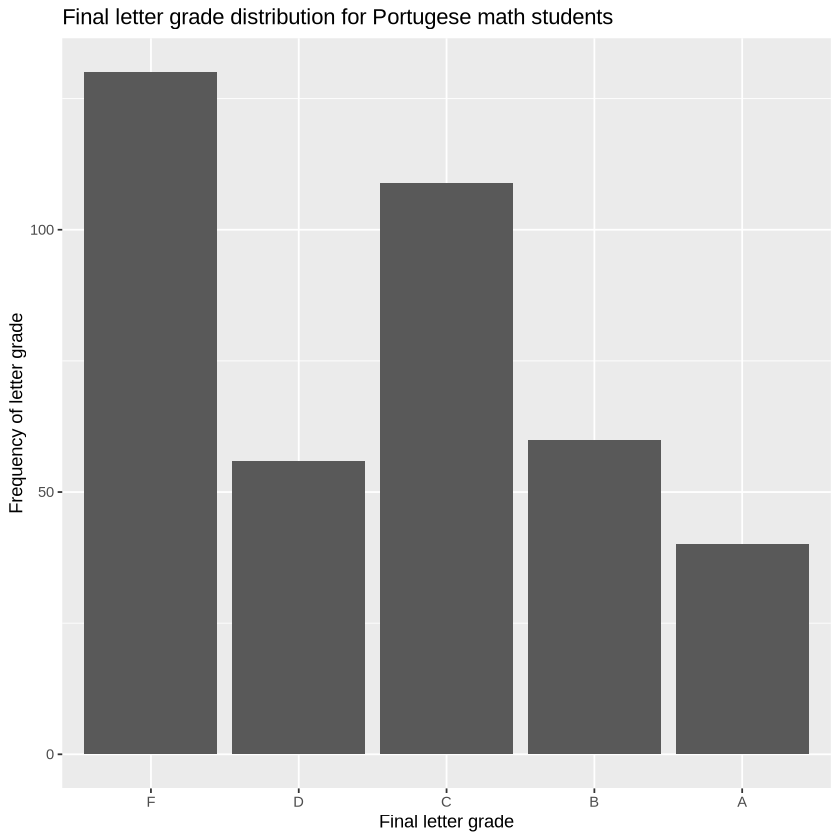

In [69]:
math_plot <- ggplot(clean_math_data, aes(x=letter_grade)) +
                geom_bar(stat='count') +
                labs(x="Final letter grade",
                y="Frequency of letter grade") +
                ggtitle("Final letter grade distribution for Portugese math students") # investigate which grades are most common

math_plot

### Further Exploratory Data Analysis

Here, we plot the frequency of each predictor: free time (scale 1-5), study time (scale 1-4),  and absences (0-93).

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


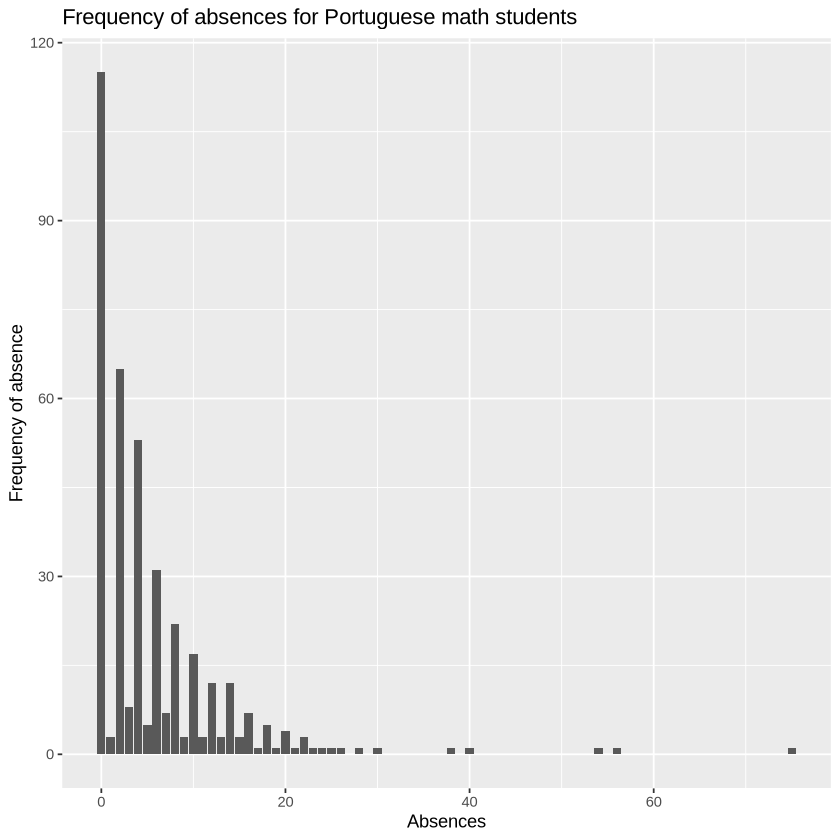

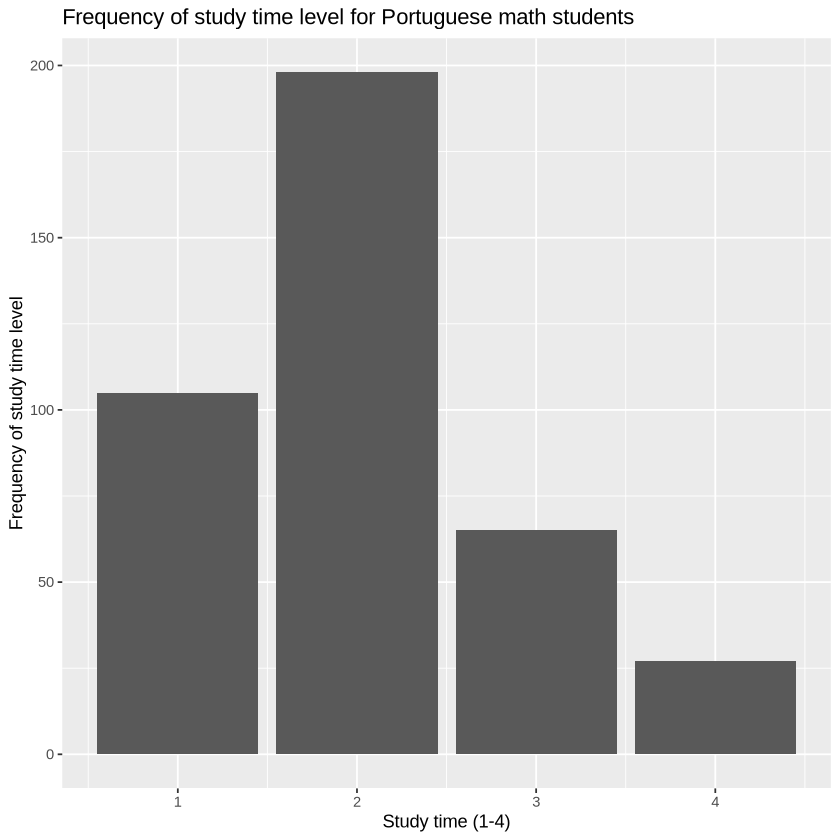

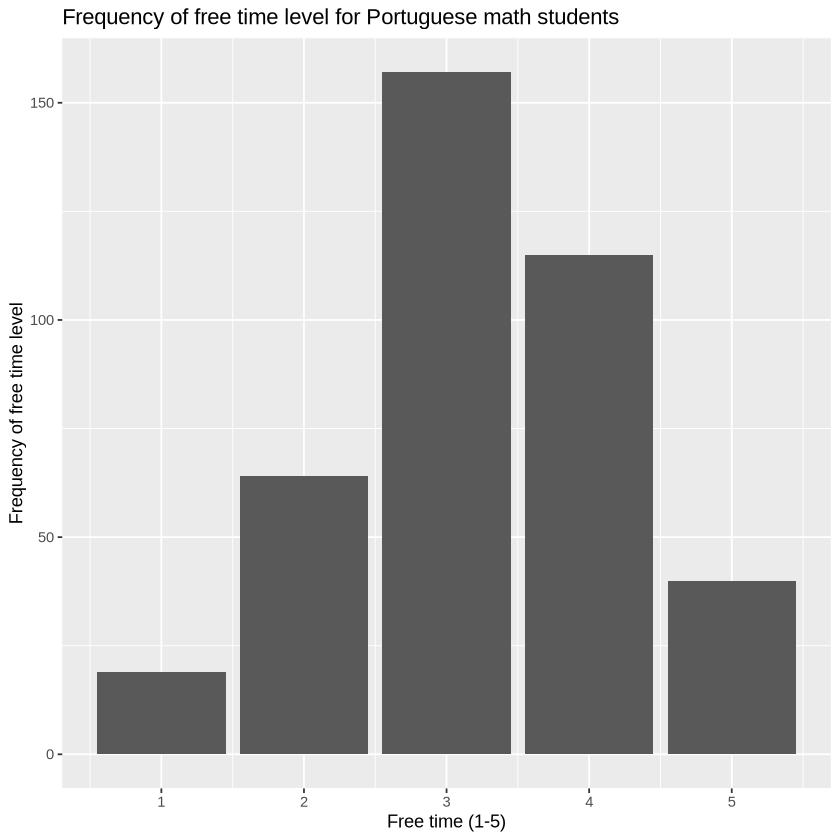

In [70]:
freetime_dist <- ggplot(clean_math_data, aes(x=freetime)) + # free time after school (numeric: from 1 - very low to 5 - very high)
                    geom_bar(stat='count') +
                    labs(x='Free time (1-5)',
                         y='Frequency of free time level') +
                        ggtitle('Frequency of free time level for Portuguese math students')

studytime_dist <- ggplot(clean_math_data, aes(x=studytime)) + # weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
                    geom_bar(stat='count') +
                    labs(x='Study time (1-4)',
                         y='Frequency of study time level') +
                        ggtitle('Frequency of study time level for Portuguese math students')
absences_dist <- ggplot(clean_math_data, aes(x=absences)) + #  number of school absences (numeric: from 0 to 93)
                    geom_histogram(stat='count') +
                    labs(x='Absences',
                         y='Frequency of absence') +
                        ggtitle('Frequency of absences for Portuguese math students')

absences_dist
studytime_dist
freetime_dist

### Methods:


- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results


- We will conduct our data analysis on numerical values that have higher correlation in order to show a trend. We intend to use lifestyle based variables like study time, free time, and absences to find their effects on the final math grades of students attending the given school.

- One way we will visualize the results is by using a scatterplot to plot our variable on the x-axis vs the grade percentage on the y axis.
  
- Another way that the data could be visualized is by comparing the correlational values of the variables we choose on a bar graph, in order to display how much impact, if any, each variable has on final math grade.



### Expected outcomes and significance:
Our project aims to analyze the impact of study time, free time, and absences on student grades to understand which factors most predict academic success. We will explore the relationship between more study time and higher grades, the role of free time in academic and personal well-being, and the negative effects of frequent absences. Our findings will help inform curriculum development, educational policy, and the creation of targeted interventions to promote effective study habits, balanced leisure activities, and regular attendance. Ultimately, this could lead to improved educational outcomes, student development, and preparation for future opportunities.
 
Future Questions: How could schools and educational institutions measure the long-term success of personalized intervention strategies that are based on student's specific patterns in study time, free time, and attendance? How might the interaction between study habits, leisure time, and attendance during formative educational years influence cognitive development and decision-making skills into adulthood?

